# Projet Steganographie texte dans une image rbv

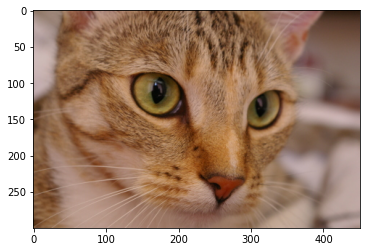

In [241]:
import numpy as np
import matplotlib.pyplot as plt
import skimage

img = skimage.data.chelsea()
plt.imshow(img)
plt.show()

In [242]:
print("Y :", img.shape[0])
print("X :", img.shape[1])
print("Image en couleur donc", img.shape[2],"pixels par pixel")

print("\nNombre de pixels total que l'on peut coder:", img.shape[0]*img.shape[1]*img.shape[2])

Y : 300
X : 451
Image en couleur donc 3 pixels par pixel

Nombre de pixels total que l'on peut coder: 405900


## Etape 1 : Transformer chaque caractère en code ASCII puis binaire

In [243]:
message = "hhhhhhh"

In [244]:
def string_to_binaire(message):
    liste_de_binaire = []
    
    # On ajoute un mot-code STOP à la fin du message pour simplifier le décodage
    # Hint : STOP s'écrit en binaire : 01010011, 01010100, 01001111, 01010000
    STOP = ['01010011', '01010100', '01001111', '01010000']
    
    for lettre in message :
        lettre_asci = ord(lettre)
        lettre_binaire = bin(lettre_asci)
        lettre_binaire = lettre_binaire[2:].zfill(8)
        liste_de_binaire.append(lettre_binaire)
        
    return liste_de_binaire + STOP

liste_binaire = string_to_binaire(message)
    
def ligne_binaire(liste):
    ''' 
    ligne binaire est une fonction permettant d'obtenir à partir d'une liste de suite d'octet,
    une seule suite d'octet encodant l'intégralité du message 
    
    liste : le message sous forme de liste de caractères encodé en binaire 
    
    retourne le message écrit sous forme binaire avec des caractères encodés sur 8 bits '''
    chiffres = ""
    for i in liste:
        chiffres += i
        
    return chiffres

message_bin_flat = ligne_binaire(liste_binaire)

In [245]:
message_bin_flat

'0110100001101000011010000110100001101000011010000110100001010011010101000100111101010000'

On remplace le dernier bit de chaque couleur de chaque pixel par les bits qu'on veut cacher

In [246]:
import random

def generate_cle(coef, img, message):
    nbr_pixels = img.shape[0]*img.shape[1]*img.shape[2]
    MAX = nbr_pixels-1
    
    random.seed(coef)
    liste = [int(random.random()*nbr_pixels-1) for _ in range(MAX)]
    indexes = np.unique(liste, return_index=True)[1]
    return [liste[index] for index in sorted(indexes)]

liste = generate_cle(23, img, message)
max(liste)

405898

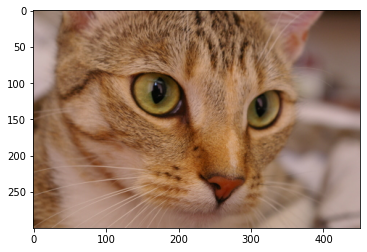

In [247]:
def encoder_image(img, chiffres, lsb, cle):
    # Tableau de string : va contenir les valeurs de nos bits (rouge,bleu,vert) en binaire
    # img_bin = np.chararray((img.shape[0], img.shape[1], img.shape[2]), itemsize=8)
    
    
    # 1 : flatten toute l'image
    # sur chaque pixel qui va être codé : 
         # on va créer un temp qui prend la valeur binaire
         # decode("utf-8") ce temp
         # on la modifie avec le nouveau message
         # int(temp, 2)
         # on remplace la valeur de l'image par le temp
    
    img_flat = img.flatten().copy()
    
    for case in cle[:len(chiffres)//lsb] :
        temp = bin(img_flat[case])[2:].zfill(8)
        #temp = temp.decode("utf-8")
        
        temp = temp[:8-lsb] + chiffres[0:lsb]
        chiffres = chiffres[lsb:]
        
        temp = int(temp, 2)
        
        img_flat[case] = temp
    
    img_encoded = np.reshape(img_flat, img.shape)
        
    return img_encoded

img_encoded = encoder_image(img, message_bin_flat, 3, liste)
plt.imshow(img_encoded)
plt.show()

## Etape 4 : Decoder le message

In [ ]:
def find_secret_message(image_encoded, lsb, cle):

    # flatten l'image
    # pour chaque pixel de la liste "clé" :
        # on met en binaire
        # on récupère les 2 bits (car lsb = 2)
        # quand on a 8 bits : on stocke la variable (binaire) dans une liste (message_encoded_bin.append(bits))
        # quand on a 4 variables dans la liste : on regarde si ça fait le mot STOP
        # si oui : on arrête le pour
        
    img_flat = img_encoded.flatten().copy()
    i = 0
    message_encoded = []
    bits = ""
    motcode = ""
    
    while(True):
        print(i, cle[i])
        temp = bin(img_flat[cle[i]])[2:].zfill(8)
        
        bits += temp[8-lsb:]
        
        if (len(bits) >= 8):
            if (len(bits) > 8):
                bits_8 = bits[:8]
                print(bits_8)
                bits_reste = bits[8:]
            else:
                bits_8 = bits
                bits_reste = ""
                
            message_encoded.append(chr(int(bits_8,2)))
            
            # A partir de 4 lettres, on peut penser qu'il y a le mot-code STOP
            # On récupère donc ces 4 dernières lettres et on regarde si c'est STOP
            # Si c'est le cas : on arrête la recherche de binaire
            if(len(message_encoded)>=4):
                maximum = len(message_encoded)
                motcode = message_encoded[maximum-4:maximum]
                
                # On enlève les 4 lettres binaires à la fin du message recupéré
                if(motcode == ['S','T','O','P']):
                    message_encoded = message_encoded[:maximum-4]
                    break;
            
            bits = bits_reste
            
        i += 1
        print(message_encoded)
        
    return (''.join(message_encoded))

secret_message = find_secret_message(img_encoded, 3, liste)
print(secret_message)

0 375401
[]
1 385038
[]
2 362237
01101000
['h']
3 33912
['h']
4 240302
['h']
5 171998
01101000
['h', 'h']
6 215161
['h', 'h']
7 52888
['h', 'h', 'h']
8 77930
['h', 'h', 'h']
9 180451
['h', 'h', 'h']
10 89718
01101000
['h', 'h', 'h', 'h']
11 184696
['h', 'h', 'h', 'h']
12 10051
['h', 'h', 'h', 'h']
13 34814
01101000
['h', 'h', 'h', 'h', 'h']
14 288191
['h', 'h', 'h', 'h', 'h']
15 170983
['h', 'h', 'h', 'h', 'h', 'h']
16 208077
['h', 'h', 'h', 'h', 'h', 'h']
17 298014
['h', 'h', 'h', 'h', 'h', 'h']
18 145715
01101000
['h', 'h', 'h', 'h', 'h', 'h', 'h']
19 23360
['h', 'h', 'h', 'h', 'h', 'h', 'h']
20 317860
['h', 'h', 'h', 'h', 'h', 'h', 'h']
21 239124
01010011
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'S']
22 267045
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'S']
23 252059
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'S', 'T']
24 394020
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'S', 'T']
25 147256
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'S', 'T']
26 308396
01001111
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'S', 'T', 'O']
27 

942 150060
['h', 'h', 'h', 'h', 'h', 'h', 'h', 'S', 'T', 'O', 'Q', '\x06', 'd', '\x00', 'õ', '}', 'é', '\n', '>', 'm', '\x10', 'É', '+', '\x83', '\x88', '\x10', 'U', 'd', '\x04', '·', 'ä', 'À', 'ý', 'ã', '\x88', '=', '(', '\x15', '¾', 'Y', '[', 'ÿ', '}', 'Ä', '³', 'd', 'E', '³', '\xad', '\x1a', '\x1c', '\x9b', '5', '\x0e', '\x12', '<', 'j', '#', 'P', 'Ò', 'Â', 'c', '\x1b', 'É', 'Ô', '5', 'f', 'Z', 'y', '÷', 'È', '\x93', 'ê', '\x8a', 'Ð', 'R', 'F', '6', '\x05', 'W', 'µ', 'T', '\x15', 'E', 'i', '\n', '\n', '\x0e', 'õ', '¢', 'ý', 'Ö', 'b', 'º', 'G', 'J', 'ÿ', '´', '\x0f', '\x8a', '\x89', 'Q', '\x8e', 'X', '\x9e', 'ä', '\x13', 'Ú', '#', '\x95', '\x90', '\x8d', 'à', '¸', '\x8d', 'h', '\x8d', '\x89', '2', '"', '>', '´', 's', '\x0b', 'è', 'ë', 'v', 'A', '[', 'K', '\x9a', '®', '\x10', 'Ô', '\x93', '\x9f', '\x91', '\x80', '\r', 'E', '>', 'ç', 'í', 'z', '/', 'º', 'n', '[', '6', '\x8d', '\x00', '\x12', 'µ', '½', 'Y', '8', '<', '\x03', 'g', 'Q', '\x88', '¬', ' ', 'ã', '\x96', 'j', 'ñ', 'î', '\x1e'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Comparons visuellement les deux images

In [28]:
def histogramme(image, titre, num):
    plt.subplot(1,2,num)
    plt.hist(image.ravel(), bins = range(0,256), color = "gray")
    plt.xlabel('Valeurs')
    plt.ylabel('Nombre de pixels')
    plt.title(titre)

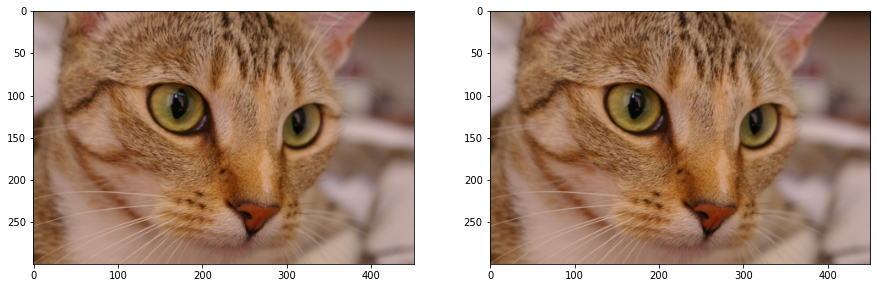

In [29]:
plt.figure(figsize = (15, 15))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img_encoded)
plt.show()

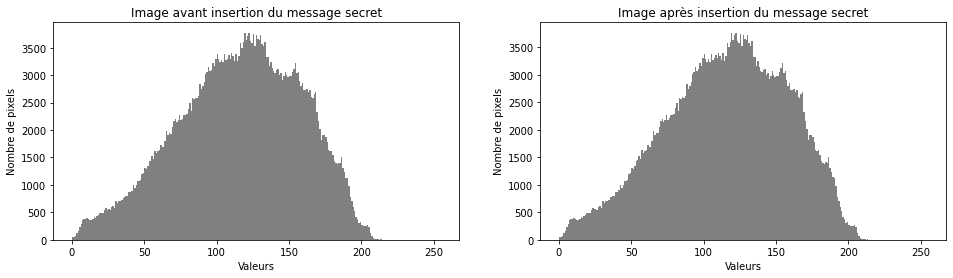

In [30]:
plt.figure(figsize=(16,4))
histogramme(img, "Image avant insertion du message secret", 1)
histogramme(img_encoded, "Image après insertion du message secret", 2)

## Petits tests pour essayer de générer une clé pseudo aléatoire

Ici on a pleins de nombres (plus précisement on a le nombre de lettres du message), qui correspondent aux pixels de l'image que nous allons coder. La clé donné sera 23 et la personne pourra lire le message secret.

**Rappel** : 

- Longueur Y : 300
- Longueur X : 451
- Image en couleur donc 3 pixels par pixel

Nombre de pixels total que l'on peut coder : 405900